In [ ]:
# This dataset describes all olympic athletes, the year they participated, the event they participated in, 
# and whether they received a medal. The data is split into two files, olympics_events.csv and olympics_games.csv,
# describing the events and metadata of the games, respectively. 
# The data has been adjusted from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [73]:
# Load the two files, olympics_events.csv and olympics_games.csv, and display the first 10 lines of each data frame.

#!conda install pandas
import pandas as pd
from IPython.display import display
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

events = pd.read_csv("../data/olympics_events.csv")
games = pd.read_csv("../data/olympics_games.csv")
display(events.head(10), games.head(10))

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37
1,A Lamusi,M,23.0,170.0,60.0,CHN,Judo,Judo Men's Extra-Lightweight,NaN,48
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Football,Football Men's Football,NaN,6
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,36
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,36
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,38
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,38
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,39
9,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,39


,ID,Year,Season,City
0,0,1896,Summer,Athina
1,1,1900,Summer,Paris
2,2,1904,Summer,St. Louis
3,3,1906,Summer,Athina
4,4,1908,Summer,London
5,5,1912,Summer,Stockholm
6,6,1920,Summer,Antwerpen
7,7,1924,Summer,Paris
8,8,1924,Winter,Chamonix
9,9,1928,Summer,Amsterdam


In [51]:
# Merge the two data frames on the GamesID and ID columns. Drop the now-unnecessary id-columns afterwards.

events = events.merge(
    right=games, left_on="GamesID", right_on="ID", how="outer")
events = events.drop(["GamesID", "ID"], axis='columns')
display(events.head())

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,1992,Summer,Barcelona
1,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,1992,Summer,Barcelona
2,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,1992,Summer,Barcelona
3,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,1992,Summer,Barcelona
4,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,1992,Summer,Barcelona


In [11]:
#  Malaysia's olympic nationality code is MAS. Prior to this, the Federation of Malaya competed under the code MAL.
# Likewise, Sarawak and Sabah competed as North Borneo (NBO).

# Identify which years did the Federation of Malaya compete in the olympics

events.loc[events["Nationality"] == "MAL", "Year"].unique()

array([1956, 1960], dtype=int64)

In [12]:
# Identify which years did the North Borneo compete in the olympics

events.loc[events["Nationality"] == "NBO", "Year"].unique()

array([1956], dtype=int64)

In [17]:
# Identify which years did the Malaysia compete in the olympics

events.loc[events["Nationality"] == "MAS", "Year"].unique() 

array([1992, 2012, 2000, 1996, 2008, 2016, 2004, 1984, 1968, 1972, 1988,
       1976, 1964], dtype=int64)

In [18]:
# Identify how many athletes that Malaysia (MAS) has send to the olympics in total

len(events.loc[events["Nationality"] == "MAS", "Name"].unique())

301

In [25]:
# Identify how many men and women has Malaysia (MAS) sent to the Olympics in total. 
# Keep in mind that athletes can participate in multiple events and multiple years.
# Each person should only ever be counted once.

# Malaysian athletes and their genders
athletes_mas = events.loc[events["Nationality"] == "MAS", ["Name", "Sex"]]

# Remove duplicates from this data frame
athletes_mas_unique = athletes_mas.drop_duplicates() 

# Print the output
athletes_mas_unique["Sex"].value_counts()   


M    247
F     54
Name: Sex, dtype: int64

In [26]:
# Identify how many men and women has Malaysia (MAS) sent to the Olympics each year?

athletes_mas = events.loc[events["Nationality"] == "MAS", ["Name", "Sex", "Year"]]

athletes_mas_unique = athletes_mas.drop_duplicates()

display(athletes_mas_unique.groupby("Year")["Sex"].value_counts())

display(athletes_mas_unique.groupby(["Year", "Sex"]).size())

Year  Sex
1964  M      57
      F       4
1968  M      31
1972  M      42
      F       3
1976  M      23
1984  M      20
      F       1
1988  M       5
      F       4
1992  M      26
1996  M      32
      F       3
2000  M      32
      F       8
2004  M      18
      F       8
2008  M      18
      F      14
2012  M      16
      F      13
2016  M      17
      F      15
Name: Sex, dtype: int64

Year  Sex
1964  F       4
      M      57
1968  M      31
1972  F       3
      M      42
1976  M      23
1984  F       1
      M      20
1988  F       4
      M       5
1992  M      26
1996  F       3
      M      32
2000  F       8
      M      32
2004  F       8
      M      18
2008  F      14
      M      18
2012  F      13
      M      16
2016  F      15
      M      17
dtype: int64

In [27]:
# Identify the ratio of male to female athletes sent by Malaysia compare to the global ratio for the year 2016

events_2016 = events.loc[events["Year"] == 2016] 
athletes_2016 = events_2016[["Name", "Sex", "Nationality"]]

athletes_2016 = athletes_2016.drop_duplicates()

athletes_2016.head()

,Name,Sex,Nationality
128213,Andreea Aanei,F,ROU
128214,Nstor Abad Sanjun,M,ESP
128220,Antonio Abadia Beci,M,ESP
128221,Giovanni Abagnale,M,ITA
128222,Patimat Abakarova,F,AZE


In [28]:
# Global ratio
athlete_count_global = athletes_2016["Sex"].value_counts()
athlete_count_global

M    6144
F    5031
Name: Sex, dtype: int64

In [29]:
athlete_ratio_global = athlete_count_global.loc["M"] / athlete_count_global.loc["F"]
print("Global male-to-female ratio: {:.2f}".format(athlete_ratio_global))

# Malaysian ratio
athletes_2016_mas = athletes_2016.loc[athletes_2016["Nationality"] == "MAS"]
athlete_count_mas = athletes_2016_mas["Sex"].value_counts()
athlete_ratio_mas = athlete_count_mas.loc["M"] / athlete_count_mas.loc["F"]
print("Malaysian male-to-female ratio: {:.2f}".format(athlete_ratio_mas))

Global male-to-female ratio: 1.22
Malaysian male-to-female ratio: 1.13


In [32]:
# Identify how many gold medals has each country won? How about Malaysia (MAS)?

medals = events.loc[~events["Medal"].isna()]
medal_table = medals.groupby(["Nationality", "Medal"]).size()
print(medal_table)
print()
print(medal_table.loc["MAS"])

Nationality  Medal 
AFG          Bronze     2
AHO          Silver     1
ALG          Bronze     8
             Gold       5
             Silver     4
                       ..
ZAM          Bronze     1
             Silver     1
ZIM          Bronze     1
             Gold      17
             Silver     4
Length: 362, dtype: int64

Medal
Bronze     5
Silver    11
dtype: int64


In [33]:
# Identify median age of gold medalists

events.groupby(["Sport", "Medal"])["Age"].median().unstack()

Medal,Bronze,Gold,Silver
Sport,,,
Aeronautics,NaN,26.0,NaN
Alpine Skiing,24.0,24.0,24.0
Alpinism,NaN,38.0,NaN
Archery,26.0,26.5,27.0
Art Competitions,42.0,40.0,41.0
...,...,...,...
Tug-Of-War,26.0,30.0,29.5
Volleyball,25.0,26.0,25.0
Water Polo,25.0,26.0,26.0


<AxesSubplot:xlabel='Year'>

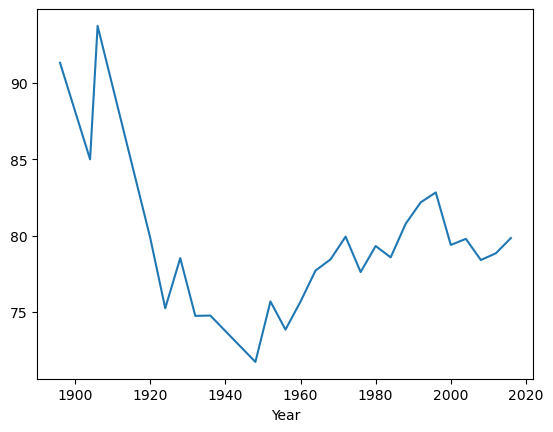

In [35]:
# Identify how has the mean weight of all weightlifter competitors changed throughout the years

events_swimming = events.loc[events["Sport"] == "Weightlifting"]
events_swimming.groupby("Year")["Weight"].mean().plot()

In [36]:
# Identify the mean and standard deviation of the BMI of athletes in each sports discipline

events["BMI"] = events["Weight"] / (events["Height"]/100)**2
bmi_table = events.groupby("Sport")["BMI"].agg(["mean", "std"])
bmi_table.sort_values("mean")

,mean,std
Sport,,
Rhythmic Gymnastics,17.286514,1.312635
Synchronized Swimming,19.670156,1.421450
Triathlon,20.394810,1.324257
Figure Skating,20.839866,2.153338
Ski Jumping,20.902259,1.924349
...,...,...
Jeu De Paume,NaN,NaN
Military Ski Patrol,NaN,NaN
Polo,NaN,NaN


In [61]:
# Identify what country has the most gold medals in certain sports discipline
# football
events.loc[
    (events["Sport"] == "Football") & 
    (events["Medal"] == "Gold"), "Nationality"].value_counts()

USA    66
HUN    46
URS    36
GBR    36
ARG    34
URU    31
CMR    18
GER    18
ESP    17
GDR    17
NOR    17
BRA    17
POL    17
MEX    16
YUG    16
TCH    16
NGR    16
FRA    16
ITA    14
BEL    14
CAN    13
SWE    12
DEN    12
Name: Nationality, dtype: int64

In [43]:
# Badminton
events.loc[
    (events["Sport"] == "Badminton") & 
    (events["Medal"] == "Gold"), "Nationality"].value_counts()

CHN    28
INA    11
KOR    11
JPN     2
DEN     1
ESP     1
Name: Nationality, dtype: int64